In [1]:
from corescore.masks import CoreImageProcessor, LABELS
from corescore.metrics import Metrics
from skimage.io import imshow, imread
from skimage.measure import label, regionprops

In [2]:
fix_dir = './tests/fixtures/images'
labels = './tests/fixtures/labeltool.json'


This interface I would change, so rather than always processing a directory of training images, writing a set of masks and returning the filenames, we can do it on a per-image basis. But is cosmetic.

In [3]:
coreproc = CoreImageProcessor(fix_dir, labels=labels)
sample = coreproc.core_types[0]

INFO:root:/home/jo/CoreScore/tests/fixtures/images/train_masks/S00101254.png
/home/jo/CoreScore/corescore/masks.py:197: UserWarning: /home/jo/CoreScore/tests/fixtures/images/train_masks/S00101254.png is a low contrast image
  imsave(fname, mask)
/home/jo/miniconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


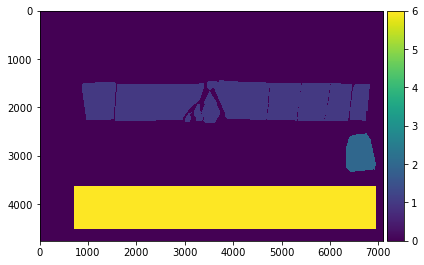

In [4]:
mask_file = coreproc.processImage(sample)
imshow(mask_file)

Show the grayscale colour indexes assigned to each labelled area in the mask

In [5]:
mask = imread(mask_file)
set(mask.flatten())

{0, 1, 2, 6}

Compare with the list of labels from the LabelTool application

In [6]:
LABELS

['Void',
 'Rock_Fragment',
 'Rock_Fragment_2',
 'Paper',
 'Core_Plug',
 'Text',
 'Box']

Set all non-rock values to 0 (and do this when calculating the metrics; but we might want this on a per-box basis?

In [7]:
mask[mask > LABELS.index('Rock_Fragment_2')] = 0
set(mask.flatten())

{0, 1, 2}

Generate a set of metrics for geometrical properties of the fragments (With code mostly borrowed from the Building Stones project)

In [8]:
metrics = Metrics(mask)
metrics.parameters()

{'relative_area': 0.13958,
 'fragment_perimeter': 28262.35,
 'average_perimeter': 3532.79,
 'total_fragments': 8,
 'absolute_area': 4717631,
 'perimeter_complexity': 0.00599}